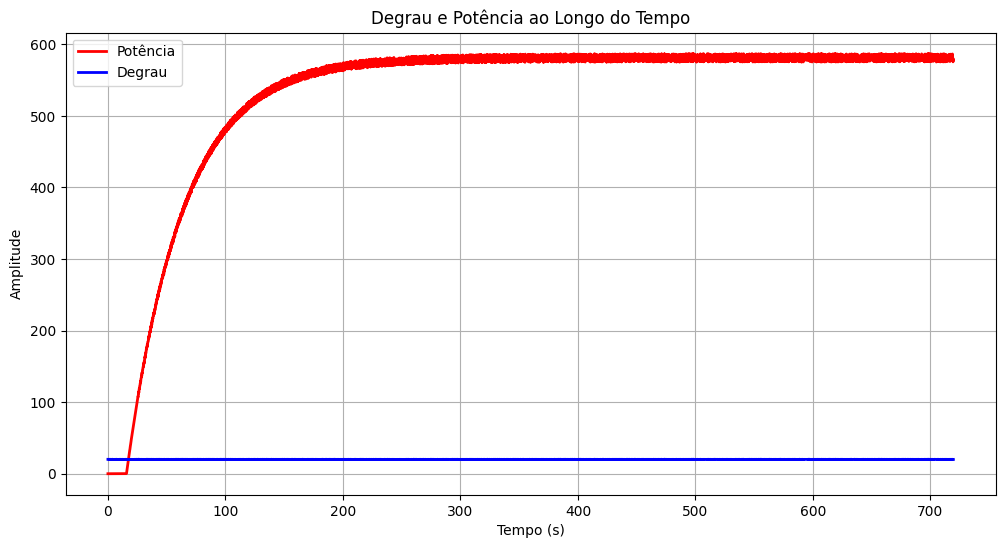

In [2]:
# Importação das bibliotecas necessárias
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Carregamento do arquivo .mat
mat = loadmat('C:/Users/victo/Desktop/C213/Dataset_Grupo4.mat')

# Extração das variáveis do arquivo .mat
degrau = mat['TARGET_DATA____ProjetoC213_Degrau']
potencia = mat['TARGET_DATA____ProjetoC213_PotenciaMotor']

# Separação das variáveis
tempo = degrau[0, :]  # Primeira linha corresponde ao tempo
degrau_values = degrau[1, :]  # Segunda linha são os valores do degrau
potencia_values = potencia[1, :]  # Segunda linha são os valores da potência

# Visualização dos dados
plt.figure(figsize=(12, 6))
plt.plot(tempo, potencia_values, label='Potência', linewidth=2, color='red')	
plt.plot(tempo, degrau_values, label='Degrau', linewidth=2, color='blue')

# Configurações do gráfico
plt.title('Degrau e Potência ao Longo do Tempo')
plt.ylabel('Amplitude')
plt.xlabel('Tempo (s)')
plt.legend()
plt.grid(True)
plt.show()



2

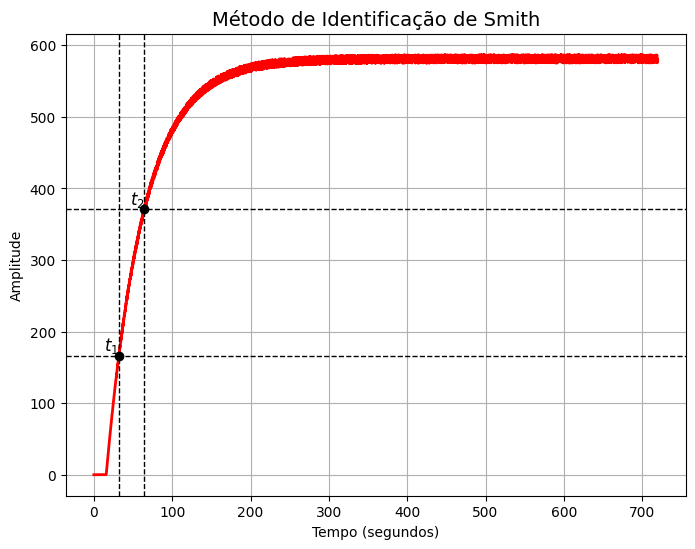

t1: 32.0
t2: 64.5
tau:  48.75
theta:  15.75
k:  29.056900774641193


In [10]:
# Importando as bibliotecas necessárias para adequar o código ao método de Smith e exibir o gráfico

import numpy as np
import matplotlib.pyplot as plt

# Separando as variáveis tempo, degrau_values e potencia_values que já foram extraídas
# valor_final já é definido como max(potencia_values)

valor_final = max(potencia_values)

# Cálculo dos valores de referência para 28.3% e 63.2% do valor final
t1_value = 0.283 * valor_final
t2_value = 0.632 * valor_final

# Inicialização de t1 e t2
t1 = None
t2 = None

# Cálculo de t1 (tempo em que a amplitude atinge 28.3% do valor final)
for x in range(len(potencia_values)):
    if potencia_values[x] >= t1_value:
        t1 = tempo[x]
        break

# Cálculo de t2 (tempo em que a amplitude atinge 63.2% do valor final)
for y in range(len(potencia_values)):
    if potencia_values[y] >= t2_value:
        t2 = tempo[y]
        break

# Definição da constante de tempo TAU e do tempo de atraso THETA
tau = 1.5 * (t2 - t1)
theta = t2 - tau

# Definição da variável K
k = max(potencia_values) / max(degrau_values)

# Plotar o gráfico com os pontos de referência e a curva de resposta ao degrau
plt.figure(figsize=(8, 6))

# Plotar a curva de resposta ao degrau
plt.plot(tempo, potencia_values, label='Resposta ao Degrau', color='red', linewidth=2)

# Destacar os pontos de 28.3% e 63.2% da curva
plt.scatter([t1, t2], [t1_value, t2_value], color='black', zorder=5)

# Traçar linhas horizontais e verticais para indicar os pontos de referência
plt.axhline(y=t1_value, color='black', linestyle='--', linewidth=1)
plt.axhline(y=t2_value, color='black', linestyle='--', linewidth=1)
plt.axvline(x=t1, color='black', linestyle='--', linewidth=1)
plt.axvline(x=t2, color='black', linestyle='--', linewidth=1)

# Adicionar rótulos para os pontos t1 e t2
plt.text(t1, t1_value, '$t_1$', verticalalignment='bottom', horizontalalignment='right', fontsize=12)
plt.text(t2, t2_value, '$t_2$', verticalalignment='bottom', horizontalalignment='right', fontsize=12)

# Adicionar rótulo para a curva
plt.title('Método de Identificação de Smith', fontsize=14)
plt.ylabel('Amplitude')
plt.xlabel('Tempo (segundos)')
plt.grid(True)

# Mostrar o gráfico
plt.show()

# Exibir valores de t1, t2, tau, theta
print('t1:',t1)
print('t2:',t2)
print('tau: ',tau)
print('theta: ',theta)
print('k: ',k)



2 - Calcular sudan...

In [ ]:
#calculo sudan

3 - Calcula o erro quadratico medio

In [ ]:
#calculo do erro quadrático médio

4. Plote as respostas do Sistema em Malha Aberta e Fechada e comente sobre as diferen¸cas
nos Tempos de subida e de acomoda¸c˜ao e no erro do processo;

5 - Calculo IMC

In [12]:
# Definição da variável Kp


# Definição da variável Ti


# Definição da variável Td


# Valores
print('Kp:',Kp)
print('Ti:',Ti)
print('Td:',Td)

Kp: 0.12782800695410984
Ti: 31.5
Td: 7.875


In [ ]:
#5 - Calculo CHR com Sobrevalor

n sei oq é isso de baixo ainda!

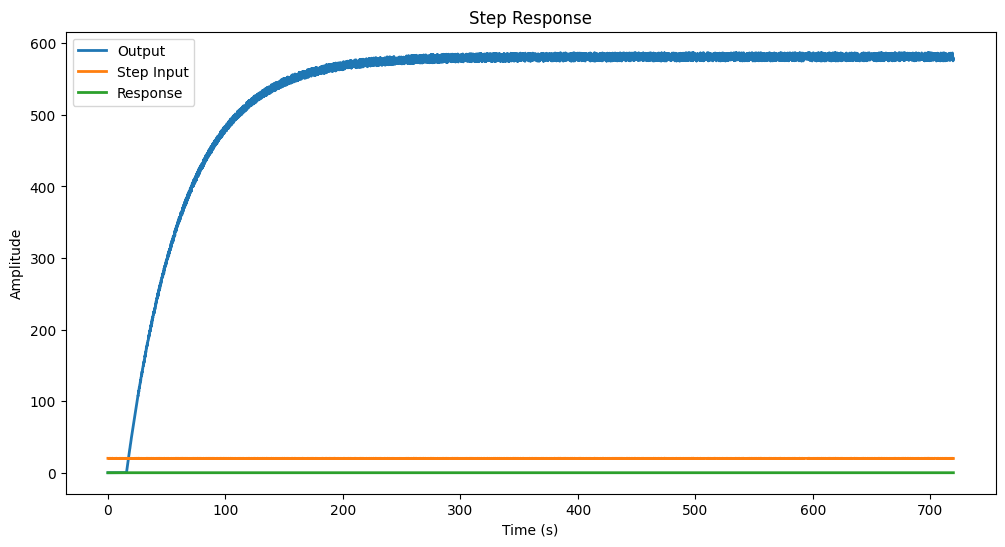

In [14]:
# Calculo da função de resposta
import numpy as np

# Define the function
func_H = lambda s: (k * (np.e ** (-theta))) / ((tau * s) + 1)

# Calculate the response function
response = np.array([func_H(s) for s in tempo])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(tempo, potencia_values, label='Output', linewidth=2)
plt.plot(tempo, degrau_values, label='Step Input', linewidth=2)
plt.plot(tempo, response, label='Response', linewidth=2)
plt.title('Step Response')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.legend()
plt.show()